# Chapter 1

In [1]:
import pandas as pd
import numpy as np
import mglearn
import sklearn
from matplotlib import pyplot as plt
import os

In [2]:
from sklearn.model_selection import train_test_split

In [ ]:
from mglearn.datasets import load_extended_boston
load_extended_boston()

In [2]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [3]:
print("Keys of iris_dataset:", iris_dataset.keys())

Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print("Target names:", iris_dataset["target_names"])

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature names:", iris_dataset["feature_names"])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Types of data:", type(iris_dataset["data"]))

Types of data: <class 'numpy.ndarray'>


In [7]:
print("Shape of the data:", iris_dataset["data"].shape)

Shape of the data: (150, 4)


In [8]:
print("First five rows of data:\n", iris_dataset["data"][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print("First five of target:", iris_dataset["target"][:5])

First five of target: [0 0 0 0 0]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state=0)

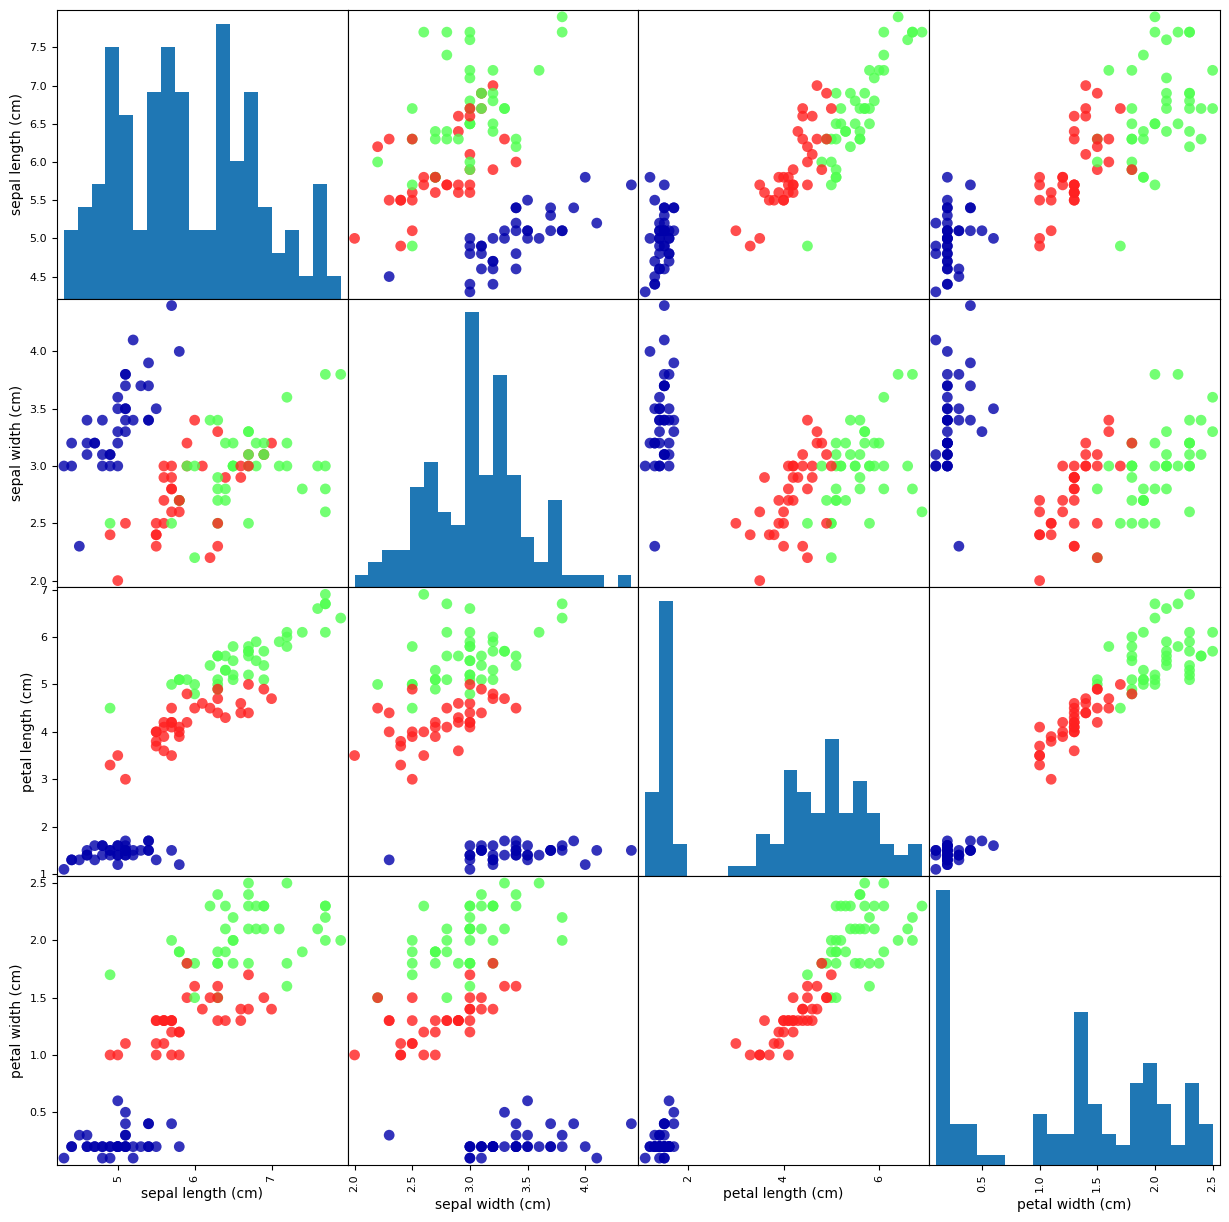

In [19]:
iris_dataframe=pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker="o", hist_kwds={"bins": 20}, s=60, alpha=0.8, cmap=mglearn.cm3)
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
import numpy as np
X_new=np.array([[5,2.9,1,0.2]])
prediction=knn.predict(X_new)

In [23]:
print("Prediction:", prediction)
print("Predicted target name:", iris_dataset["target_names"][prediction])

Prediction: [0]
Predicted target name: ['setosa']


In [24]:
y_pred=knn.predict(X_test)
print("Test set predictions:", y_pred)

Test set predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [25]:
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))

Test set score: 0.97


In [28]:
# Alternatively, use knn.score
knn.score(X_test, y_test)

0.9736842105263158

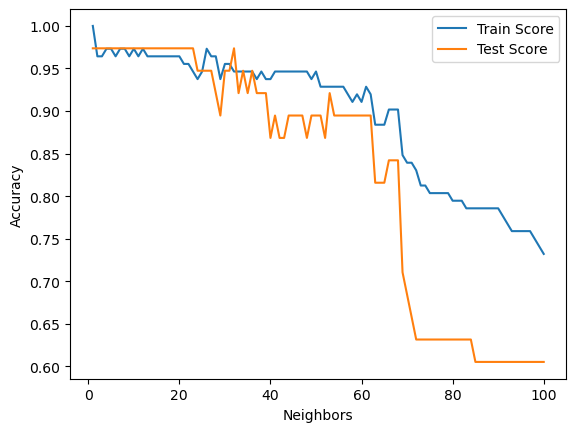

In [41]:
neighbors=[]
train_score=[]
test_score=[]
for i in range(1,101):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    neighbors.append(i)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

df=pd.DataFrame({"Neighbors":neighbors, "Train Score": train_score, "Test Score": test_score})
df.plot(x="Neighbors", ylabel="Accuracy")
plt.show()

# Chapter 2

In [11]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
print(cancer.data.shape[0],"data points,",cancer.data.shape[1],"features")

569 data points, 30 features


In [24]:
print("Features:",cancer.feature_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [28]:
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


In [29]:
from mglearn.datasets import load_boston
boston=load_boston()

In [2]:
from sklearn.linear_model import LinearRegression

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr=LinearRegression().fit(X_train, y_train)
print("make_wave coefficient: {:.2f}".format(lr.coef_[0]))
print("make_wave intercep: {:.2f}".format(lr.intercept_))

In [45]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train)
print("Training score: {:.0f}%".format(100*ridge.score(X_train,y_train)))
print("Test score: {:.0f}%".format(100*ridge.score(X_test,y_test)))

Training score: 67%
Test score: 66%


In [57]:
np.arange(0,1.1,0.1)
range(2,11,1)

range(2, 11)

In [87]:
alpha=[]
train_score=[]
test_score=[]
for i in np.arange(0.001,2.001,0.001):
    alpha.append(i)
    train_score.append(100*Ridge(alpha=i).fit(X_train,y_train).score(X_train,y_train))
    test_score.append(100*Ridge(alpha=i).fit(X_train,y_train).score(X_test,y_test))

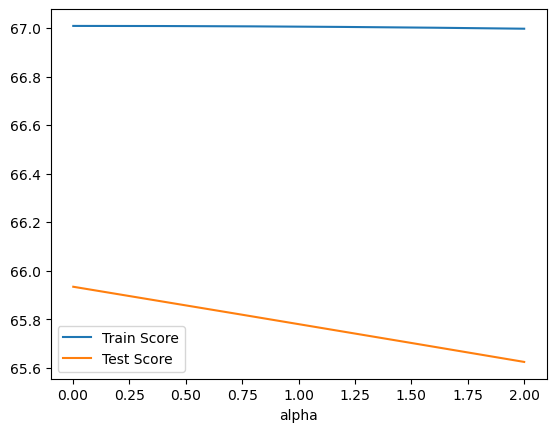

In [93]:
df=pd.DataFrame({"Alpha":alpha, "Train Score":train_score, "Test Score":test_score})
df.plot(x="Alpha", xlabel="alpha")

plt.show()

In [4]:
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))[["date","price"]]

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data_train=ram_prices[ram_prices.date < 2e+03]
data_test=ram_prices[ram_prices.date >= 2e+03]
X_train=np.array(data_train.date)[:,np.newaxis]
y_train=np.log(data_train.price)
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)
X_all=np.array(ram_prices.date)[:, np.newaxis]
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

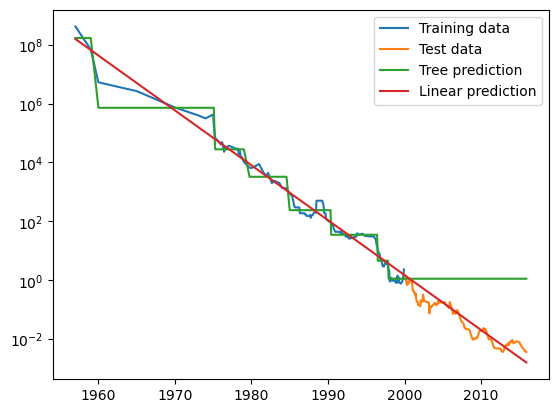

In [38]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.datasets import make_moons

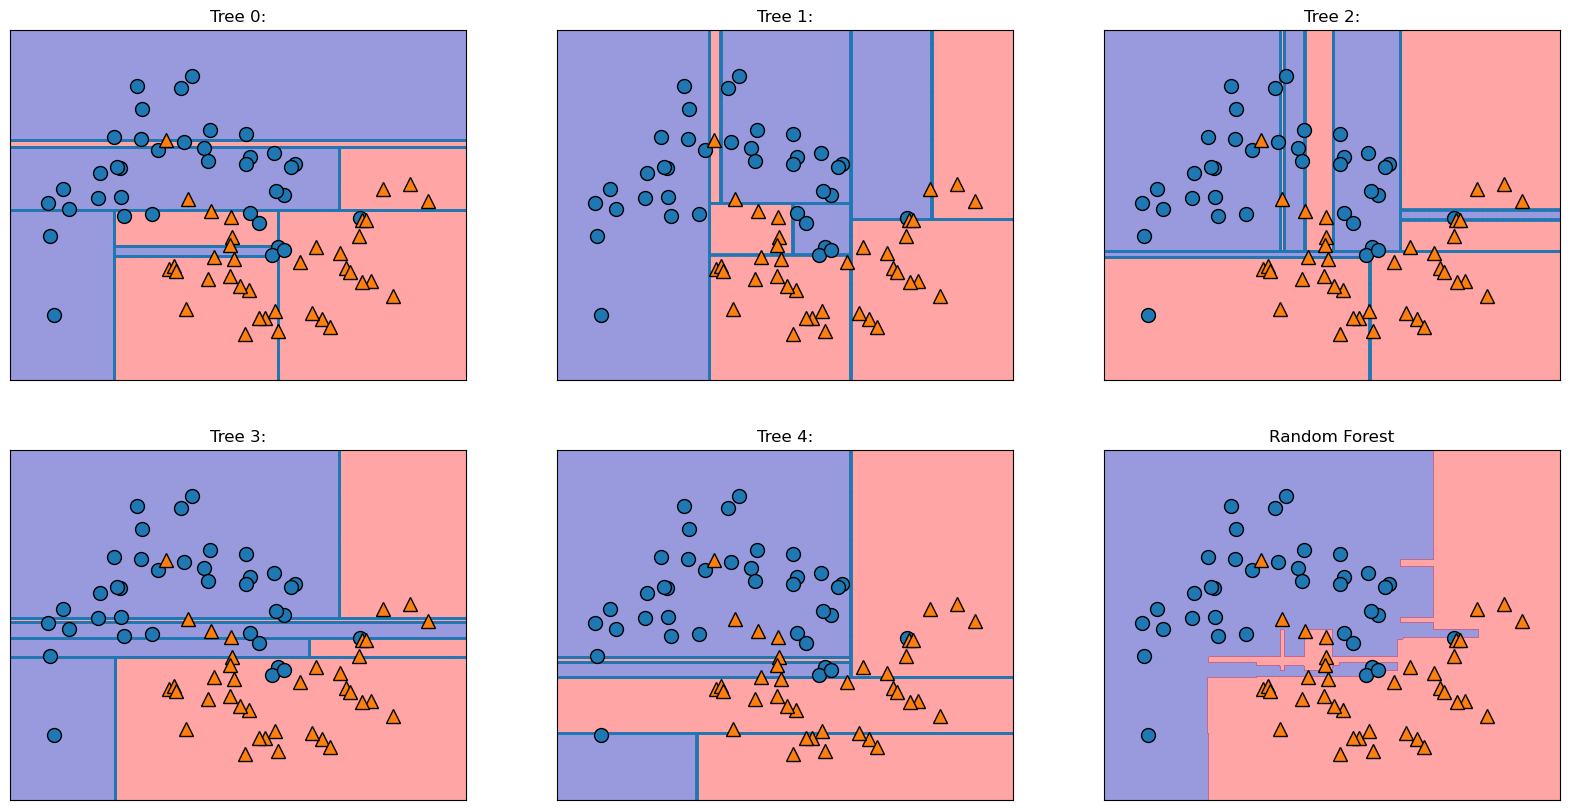

In [13]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest=RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}:".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest=RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
print("Accuracy in the training set: {:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy in the test set: {:.3f}".format(forest.score(X_test,y_test)))

Accuracy in the training set: 1.000
Accuracy in the test set: 0.972


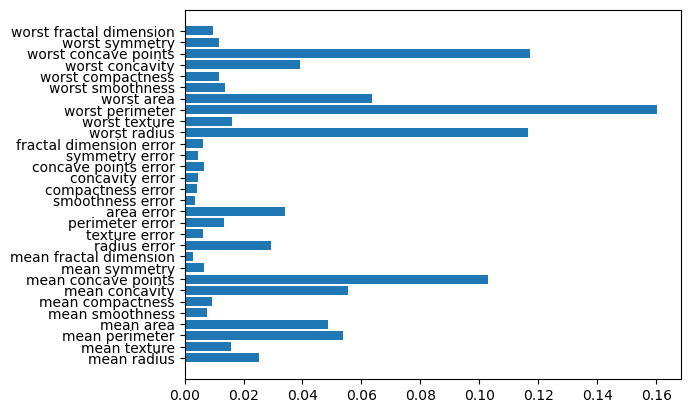

In [44]:
plt.barh(cancer.feature_names, forest.feature_importances_)
plt.show()

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)
print("Accuracy on training data: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test data: {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training data: 1.000
Accuracy on test data: 0.965


In [5]:
from sklearn.datasets import make_blobs

In [7]:
from sklearn.svm import LinearSVC

D:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


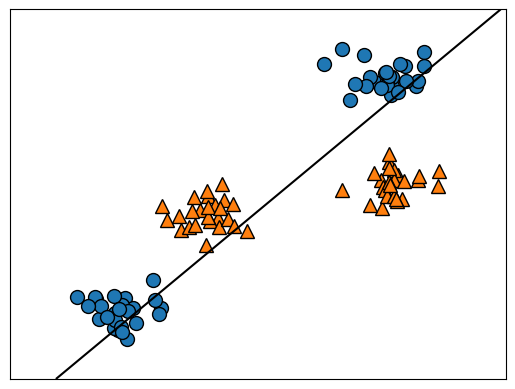

In [5]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
#mglearn.discrete_scatter(X[:,0], X[:,1], y)
linear_svm=LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

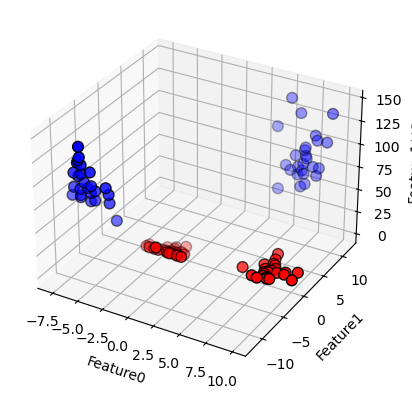

In [6]:
X_new=np.hstack([X, X[:,1:]**2])
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")
mask= y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", marker="o", s=60, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="o", s=60, edgecolor="k")
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")
plt.show()

D:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


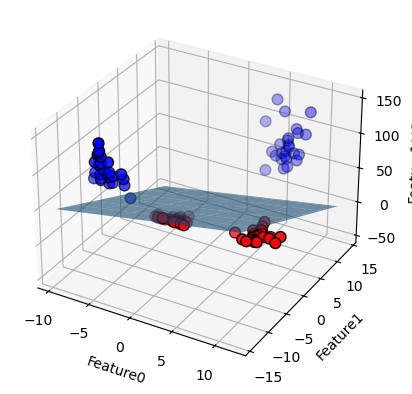

In [7]:
linear_svm_3d=LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure=plt.figure()
ax=figure.add_subplot(111, projection="3d")
xx=np.linspace(X_new[:,0].min() -2, X_new[:,0].max() + 2, 50)
yy=np.linspace(X_new[:,1].min() -2, X_new[:,1].max() + 2, 50)
XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.6)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", marker="o", s=60, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="o", s=60, edgecolor="k")
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")
plt.show()

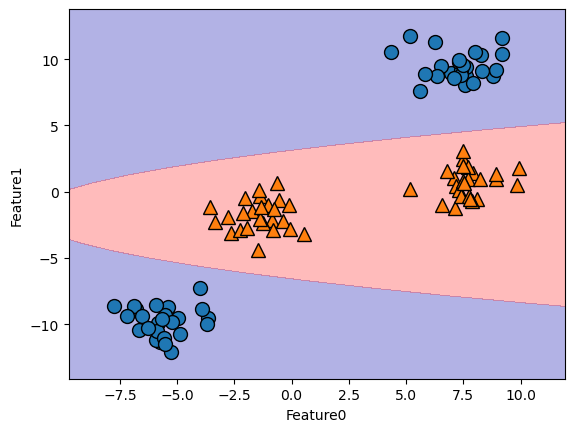

In [8]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()], alpha=.3, cmap=mglearn.cm2)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
plt.show()

In [8]:
from sklearn.svm import SVC

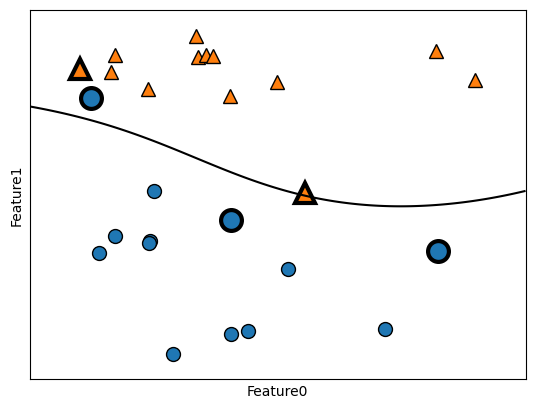

In [33]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel="rbf", C=10, gamma=.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1],sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [39]:
min_on_training=X_train.min(axis=0)# the minimum of each feature
range_on_training=(X_train - min_on_training).max(axis=0)
X_train_scaled=(X_train - min_on_training)/range_on_training
X_test_scaled=(X_test - min_on_training)/range_on_training

In [38]:
# Compare accuracy of the SVM on scaled and unscaled data
svc0=SVC().fit(X_train, y_train)
print("Accuracy of SVM trained on unscaled data on training data: {:.2f}".format(svc0.score(X_train,y_train)))
print("Accuracy of SVM trained on unscaled data on unscaled test data: {:.2f}".format(svc0.score(X_test,y_test)))

Accuracy of SVM trained on unscaled data on training data: 0.90
Accuracy of SVM trained on unscaled data on unscaled test data: 0.94


In [41]:
svc1=SVC().fit(X_train_scaled, y_train)
print("Accuracy of SVM trained on scaled data on training data: {:.2f}".format(svc1.score(X_train_scaled,y_train)))
print("Accuracy of SVM trained on scaled data on unscaled test data: {:.2f}".format(svc1.score(X_test_scaled,y_test)))

Accuracy of SVM trained on scaled data on training data: 0.98
Accuracy of SVM trained on scaled data on unscaled test data: 0.97


In [10]:
from sklearn.neural_network import MLPClassifier

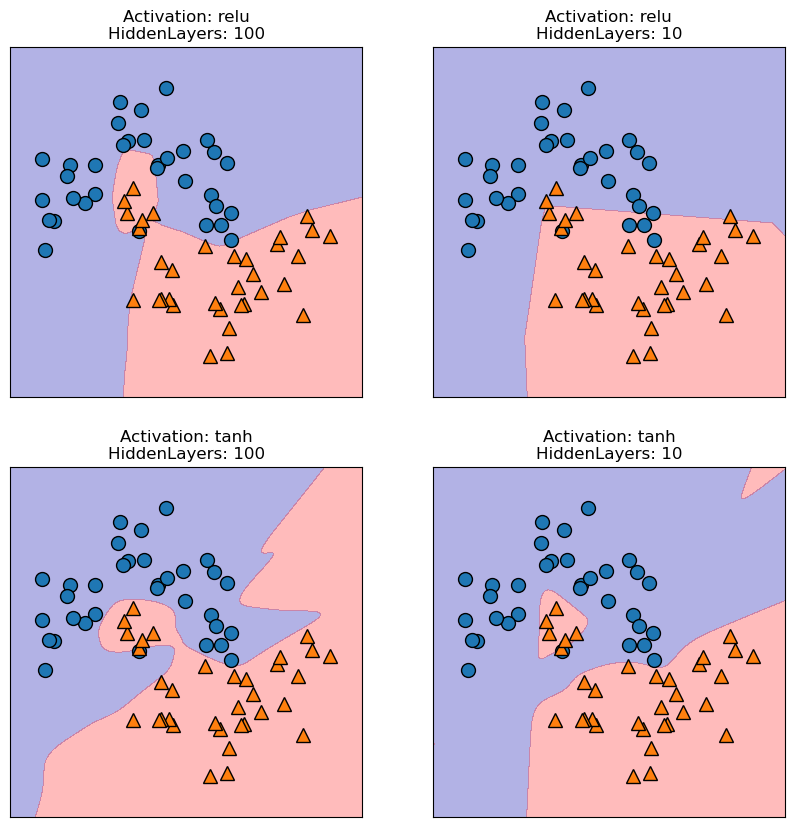

In [68]:
X, y = make_moons(n_samples=90, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(10,10))
act=["relu","relu","tanh","tanh"]
hidden=[100,10,100,10]
for a, h, ax in zip(act, hidden, axes.ravel()):# You need to use .ravel() is there's more than one row of subplots
    mlp=MLPClassifier(solver="lbfgs", activation=a, hidden_layer_sizes=h, random_state=0).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
    ax.set_title("Activation: {}\nHiddenLayers: {}".format(a,h))

plt.show()

In [12]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, random_state=0)

In [36]:
mean_on_train=X_train.mean(axis=0)# Use axis=0 to calculate the feature averages; if you want the row averages use axis=1
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train

mean_on_test=X_test.mean(axis=0)
std_on_test=X_test.std(axis=0)
X_test_scaled=(X_test-mean_on_test)/std_on_test

mlp=MLPClassifier(random_state=42).fit(X_train_scaled, y_train)
print("Accuracy on scaled training data: {:.1f}%".format(1e2*mlp.score(X_train_scaled,y_train)))
print("Accuracy on scaled test data: {:.1f}%".format(1e2*mlp.score(X_test_scaled,y_test)))

Accuracy on scaled training data: 99.3%
Accuracy on scaled test data: 95.8%


D:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
